# Clean & Preprocess - BoW + Tfidf

---

This is where the project departs from the Introduction to Analytics With R tutorial; yet still follows the broad steps.

*Features*

- A custom cleaning and preprocessing module is imported containing a repurposed version of Aurélien Geron's **EmailToWordCounterTransformer** class and his **WordCounterToVectorTransformer** class from his famous [Classification Notebook](https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb).


- A hybrid pipeline that includes sklearn's **TfidfVectorizer** class [(see Docs.)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) is created to enrich the text representation from a simple bag-of-words to a Tfidf matrix. (Text to document-frequency matrices representations are further explored in the [Document Term Matrices Notebook.](Extra_Document_Term_Matrices.ipynb))


- A quick grid search for different vocabulary sizes is performed using a baseline logistic classifier to get a first estimate of best vocabulary sizes for BoW models, given our data. A more thorough grid search including Ngrams and comparing BoW and Tfidf representations is performed in the next Notebook. 


- $97.5\%$ accuracy achieved with a Tfidf matrix of 450 unigram terms on sklearn's baseline logistic classifier.


### Setup

In [1]:
import re
import os
import time
import json

import numpy as np
import pandas as pd

from datetime import datetime

start_time = time.time()
dt_object = datetime.fromtimestamp(time.time())
day, T = str(dt_object).split('.')[0].split(' ')
print('Revised on: ' + day)

Revised on: 2021-01-12


### Load Data

In [2]:
def load_data(data):
    raw_path = os.path.join("data","1_raw")
    filename = ''.join([data, ".csv"])
    out_dfm = pd.read_csv(os.path.join(raw_path, filename))
    out_arr = np.array(out_dfm.iloc[:,0].ravel())
    return out_arr

X_train = load_data("X_train")
y_train = load_data("y_train")

### Cleanup & Preprocess

In [3]:
import urlextract
from nltk.stem import WordNetLemmatizer

with open("contractions_map.json") as f:
    contractions_map = json.load(f)

url_extractor = urlextract.URLExtract()
lemmatizer = WordNetLemmatizer()

In [4]:
import custom.clean_preprocess as cp

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('counter', cp.DocumentToWordCounterTransformer()),
                 ('bow', cp.WordCounterToVectorTransformer(vocabulary_size=100)),
                 ('tfidf', TfidfTransformer())])

In [5]:
pipe_counter = pipe['counter'].fit_transform(X_train)
pipe_bow = pipe['bow'].fit(pipe_counter)

In [6]:
print(pipe_bow.vocabulary_)

{'NUM': 1, 'i': 2, 'you': 3, 'u': 4, 'me': 5, 'not': 6, 'my': 7, 'your': 8, 'am': 9, 'have': 10, 'call': 11, 'EMOJI': 12, 'do': 13, 'now': 14, 'but': 15, 'so': 16, 'can': 17, 'or': 18, 'get': 19, 'we': 20, 'no': 21, 'if': 22, 'just': 23, 'ur': 24, 'this': 25, 'go': 26, 'how': 27, 'when': 28, 'up': 29, 'free': 30, 'what': 31, 'ok': 32, 'day': 33, 'out': 34, 'all': 35, 'come': 36, 'time': 37, 'know': 38, 'got': 39, 'good': 40, 'there': 41, 'like': 42, 'then': 43, 'only': 44, 'text': 45, 'want': 46, 'love': 47, 'need': 48, 'going': 49, 'p': 50, 'send': 51, 'one': 52, 'URL': 53, 'txt': 54, 'r': 55, 'mobile': 56, 'n': 57, 'today': 58, 'c': 59, 'sorry': 60, 'still': 61, 'home': 62, 'did': 63, 'about': 64, 'stop': 65, 'k': 66, 'back': 67, 'lor': 68, 'see': 69, 'reply': 70, 'she': 71, 'take': 72, 'week': 73, 'msg': 74, 'our': 75, 'phone': 76, 'tell': 77, 'da': 78, 'think': 79, 'any': 80, 'dont': 81, 'they': 82, 'new': 83, 'been': 84, '_': 85, 'thing': 86, 'hi': 87, 'some': 88, 'min': 89, 'nigh

In [7]:
bow = pipe_bow.transform(pipe_counter)

In [8]:
bow.toarray() # first column is "words missing from vocab"

array([[ 4,  0,  0, ...,  0,  1,  0],
       [15,  7,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ...,  0,  0,  0],
       [19,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  1, ...,  0,  0,  0]], dtype=int32)

In [9]:
 # IDF for the pipe_bow.vocabulary_ (first 10 vals)
[np.around(x,3) for x in pipe['tfidf'].fit(bow).idf_[:10]]

[1.019, 2.347, 1.987, 2.275, 2.834, 3.097, 3.184, 3.248, 3.234, 3.222]

In [10]:
tfidf = pipe['tfidf'].fit_transform(bow)

In [11]:
[np.around(x,3) for x in tfidf[:1].toarray()]

[array([0.473, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.473,
        0.   , 0.   , 0.   , 0.   , 0.485, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.564, 0.   ])]

In [12]:
# entire pipeline produces same result but does't save IDF or vocab
# we'll need the IDF vector fit from our training data
end_res = pipe.fit_transform(X_train)
[np.around(x,3) for x in end_res[:1].toarray()]

[array([0.473, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.473,
        0.   , 0.   , 0.   , 0.   , 0.485, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.564, 0.   ])]

### Logistic Regression with 450 vocab size gets 97.5% accuracy

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def grid_search_vocabsize(X, y):
    means = []
    for v_size in range(300, 900, 30):
        pipe = Pipeline([('counter', cp.DocumentToWordCounterTransformer()),
                         ('bow', cp.WordCounterToVectorTransformer(vocabulary_size=v_size)), 
                         ('tfidf', TfidfTransformer())])
        X_transformed = pipe.fit_transform(X)
        log_clf = LogisticRegression(solver="liblinear", random_state=42)
        score = cross_val_score(log_clf, X_transformed, y, cv=5, verbose=0, scoring='accuracy', n_jobs=-1)
        means.append(round(score.mean(), 4))
    return means

In [14]:
t1 = time.time()

results = grid_search_vocabsize(X_train, y_train)

mins, secs = divmod(time.time() - t1,60)
print(f'Elapsed: {mins:0.0f} m {secs:0.0f} s')

Elapsed: 2 m 56 s


In [15]:
data={'means':results, 'vocab_size':list(range(300,900,30))}
df=pd.DataFrame(data=data)
df[df["means"]==max(df["means"])]

,means,vocab_size
5,0.9751,450


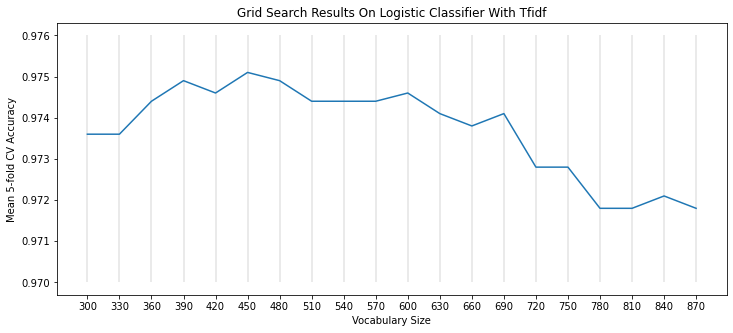

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5)) 
plt.plot(df["means"])
plt.title('Grid Search Results On Logistic Classifier With Tfidf')
plt.ylabel('Mean 5-fold CV Accuracy')
plt.xlabel('Vocabulary Size')
plt.xticks(np.arange(20), tuple(df["vocab_size"]))
plt.vlines(np.arange(20), .97, .976, colors='k', linestyles='solid', alpha=.8, linewidth=.2)
plt.show()

In [17]:
mins, secs = divmod(time.time() - start_time, 60)
print(f'Time elapsed: {mins:0.0f} m {secs:0.0f} s')

Time elapsed: 3 m 20 s


---